# Google QUEST Q&A Labeling

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. Description </h2>

<p>Computers are really good at answering questions with single, verifiable answers. But, humans are often still better at answering questions about opinions, recommendations, or personal experiences.

Humans are better at addressing subjective questions that require a deeper, multidimensional understanding of context - something computers aren't trained to do well…yet.. Questions can take many forms - some have multi-sentence elaborations, others may be simple curiosity or a fully developed problem. They can have multiple intents, or seek advice and opinions. Some may be helpful and others interesting. Some are simple right or wrong.</p>

<h2> 1.2. Problem Statement </h2>


<p>Build a model that predicts the probability of question and answer relevance.</p>

<h2>1.3 Source/Useful Links </h2>

<p>
<b> Source: </b> https://www.kaggle.com/c/google-quest-challenge
</p>

<h1>2. Data</h1>

<h2>2.1. Data Overview</h2>

<p>Data is in csv files.</p>
<ul>
  <li><b>train.csv</b> the training data (target labels are the last 30 columns).</li>
  <li><b>test.csv</b> the test set (predict 30 labels for each test set row).</li>
</ul>
<p>The data for this competition includes questions and answers from various StackExchange properties. Your task is to predict target values of 30 labels for each question-answer pair.

The list of 30 target labels are the same as the column names in the sample_submission.csv file. Target labels with the prefix question_ relate to the question_title and/or question_body features in the data. Target labels with the prefix answer_ relate to the answer feature.

Each row contains a single question and a single answer to that question, along with additional features. The training data contains rows with some duplicated questions (but with different answers). The test data does not contain any duplicated questions.

This is not a binary prediction challenge. Target labels are aggregated from multiple raters, and can have continuous values in the range [0,1]. Therefore, predictions must also be in that range.</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print('train', train.shape)
print('test', test.shape)

train (6079, 41)
test (476, 11)


In [4]:
train.head(3)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889


In [5]:
test.head(3)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com


In [6]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [7]:
test.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

<p>Above 11 columns are used for training the model.</p>

In [8]:
#seperating the target features from the train columns
feature_columns = [col for col in test.columns if col not in 'qa_id']
print('Features : ', feature_columns)

Features :  ['question_title', 'question_body', 'question_user_name', 'question_user_page', 'answer', 'answer_user_name', 'answer_user_page', 'url', 'category', 'host']


In [10]:
b=test.columns

for i in train.columns:
    if i not in b:
        a=set(train[i])
        print(len(a))

9
9
5
5
5
5
9
9
5
5
5
5
5
5
5
5
5
5
5
3
9
9
9
9
9
17
5
5
5
9


In [9]:
train[feature_columns].head(3)

,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com
2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com


<p>from train data it is noted that question_user_page, answer_user_page, url, host columns or features contains url's of data. These are not useful for processing data.</p>

In [10]:
feature_columns = [col for col in feature_columns if col not in ['question_user_page','answer_user_page','url','host']]
print(feature_columns)

['question_title', 'question_body', 'question_user_name', 'answer', 'answer_user_name', 'category']


<p>Among feature_columns the features 'question_user_name' and 'answer_user_name' are also not useful they are just names of the people who posted question and who answered thw question. So, these are not useful in predicting the question and answer relevences because the future data may not be posted and answered by the same persons.</p>

In [11]:
feature_columns = [col for col in feature_columns if col not in [ 'question_user_name', 'answer_user_name']]
print(feature_columns)

['question_title', 'question_body', 'answer', 'category']


In [12]:
#checking whether the features has any null values are not
train.isna().sum()

qa_id                                    0
question_title                           0
question_body                            0
question_user_name                       0
question_user_page                       0
answer                                   0
answer_user_name                         0
answer_user_page                         0
url                                      0
category                                 0
host                                     0
question_asker_intent_understanding      0
question_body_critical                   0
question_conversational                  0
question_expect_short_answer             0
question_fact_seeking                    0
question_has_commonly_accepted_answer    0
question_interestingness_others          0
question_interestingness_self            0
question_multi_intent                    0
question_not_really_a_question           0
question_opinion_seeking                 0
question_type_choice                     0
question_ty

In [13]:
#checking test features have null values or not
test.isna().sum()

qa_id                 0
question_title        0
question_body         0
question_user_name    0
question_user_page    0
answer                0
answer_user_name      0
answer_user_page      0
url                   0
category              0
host                  0
dtype: int64

In [6]:
train_cat

TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

category distribution


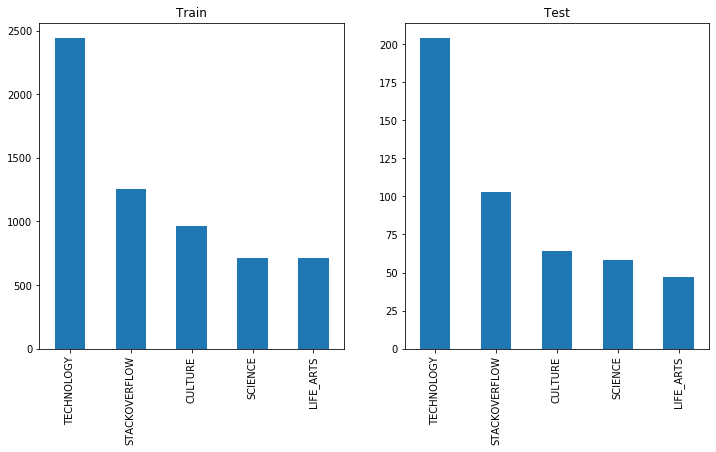

In [3]:
#bar plot for train and test dataset based on category
train_cat = train['category'].value_counts()
test_cate = test['category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_cat.plot(kind='bar', ax=axes[0])
axes[0].set_title('Train')
test_cate.plot(kind='bar', ax=axes[1])
axes[1].set_title('Test')
print('category distribution')

In [15]:
#finding duplicate data present in question title of train data
train['question_title'].value_counts().head(2)

What is the best introductory Bayesian statistics textbook?    12
What does mathematics have to do with programming?             11
Name: question_title, dtype: int64

In [16]:
#storing the indexes of question "What is the best introductory Bayesian statistics textbook?" 
ind = train.index[train['question_title']=='What is the best introductory Bayesian statistics textbook?'].tolist()

In [17]:
#displaying indexes
ind

[229, 1616, 1647, 2104, 3476, 3762, 3801, 3899, 4408, 5239, 5587, 5766]

In [18]:
#displaying category for all those indexes
for i in ind:
    print(train.loc[i]['category'])

SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE


<p>The above data shows that all the catgories of different index question are same </p>

In [19]:
ind = train.index[train['question_title']=='Important non-technical course for programmers?'].tolist()

In [20]:
ind

[234, 747, 1217, 1452, 2807, 2809, 3240, 3862, 3964, 4602, 5975]

In [21]:
for i in ind:
    print(train.loc[i]['category'])

TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY
TECHNOLOGY


<p>1.This data printed inorder to check the same question title may have same category or not. With this it can understood that the category has no role to play for improving any probabilities</p>
<p>2.The above data proves that 'category' feature also has no imporatnce for classifying the relevance of question and answer</p>

In [22]:
feature_columns = [col for col in feature_columns if col not in [ 'category']]
print(feature_columns)

['question_title', 'question_body', 'answer']


<h3>checking Test data duplicates</h3>

In [23]:
test['question_title'].value_counts()

COPY command: copy only specific columns from csv                                          1
Reduce image size without resolution change                                                1
variation in antigen binding site of antibodies                                            1
How do I import an iPhoto library into Lightroom, keeping adjustments intact?              1
Multivariate exponential smoothing and Kalman filter equivalence                           1
                                                                                          ..
Can 'Dupe' be used as a verb instead of 'Duplicate'?                                       1
SharePoint 2010: Limit search to return a Document Set after matching on its child item    1
How to find the actual working directory?                                                  1
Monitor activity to an IP Address - Windows 2003 and 2008 Server                           1
Oracle Regular Expression To replace A with Z, B with Y, C with X and 

<p>Test data has no duplicate question titles.</p>

<h3>Train features word plots</h3>

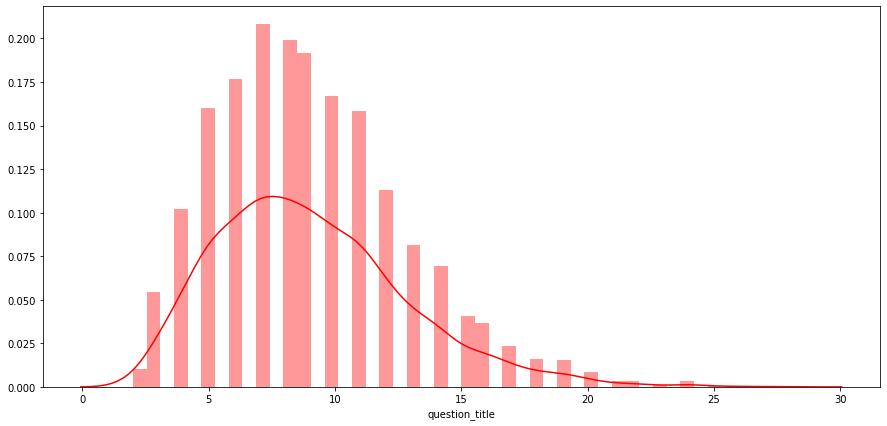

In [37]:
words = train['question_title'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [48]:
words = train['question_title'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage question_title text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage question_title text contains words less than : 14
92 percentage question_title text contains words less than : 15
93 percentage question_title text contains words less than : 15
94 percentage question_title text contains words less than : 16
95 percentage question_title text contains words less than : 16
96 percentage question_title text contains words less than : 17
97 percentage question_title text contains words less than : 17
98 percentage question_title text contains words less than : 19
99 percentage question_title text contains words less than : 20


<p>1. 99 percantage of data contains 20 words as an average for each question.</p>


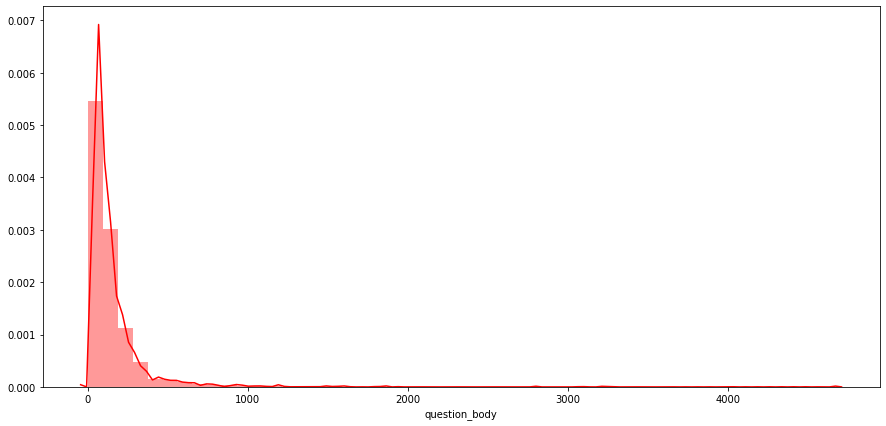

In [36]:
words = train['question_body'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [42]:
words = train['question_body'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage question_body text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage question_body text contains words less than : 300
92 percentage question_body text contains words less than : 318
93 percentage question_body text contains words less than : 342
94 percentage question_body text contains words less than : 372
95 percentage question_body text contains words less than : 433
96 percentage question_body text contains words less than : 499
97 percentage question_body text contains words less than : 580
98 percentage question_body text contains words less than : 722
99 percentage question_body text contains words less than : 1047


<p>1. Highest number of words present for question is around 4000</p>
<p>2. 99 percentage of questions contains words 1047 but it is better to consider 97 pecentage of questions contains 580 words</p>
<p>3. If 99 percentage is considered then if we perform padding while processing data then we will be getting more zeroes in data. If we consider 97 percentage then we remove around 500 features wih zeroes.</p>

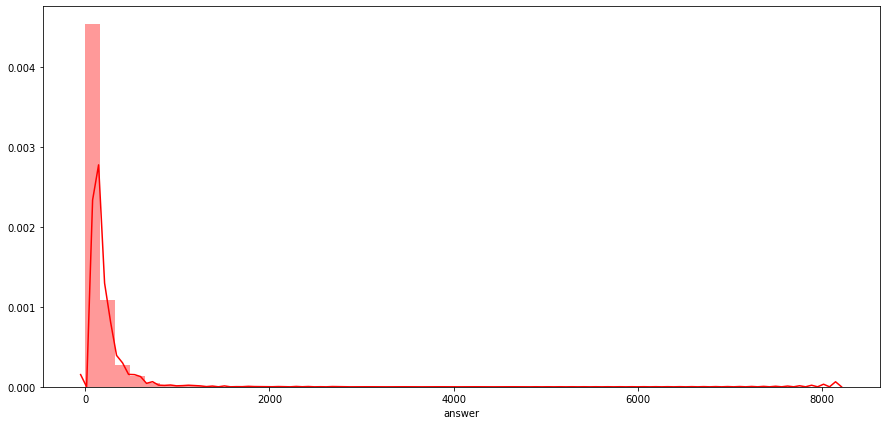

In [35]:
words = train['answer'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [43]:
words = train['answer'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage answer text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage answer text contains words less than : 314
92 percentage answer text contains words less than : 341
93 percentage answer text contains words less than : 364
94 percentage answer text contains words less than : 393
95 percentage answer text contains words less than : 430
96 percentage answer text contains words less than : 492
97 percentage answer text contains words less than : 552
98 percentage answer text contains words less than : 622
99 percentage answer text contains words less than : 884


<p>From observing above data it is better to consider 96% questions containing words</p>

<h3>Test features word plots</h3>

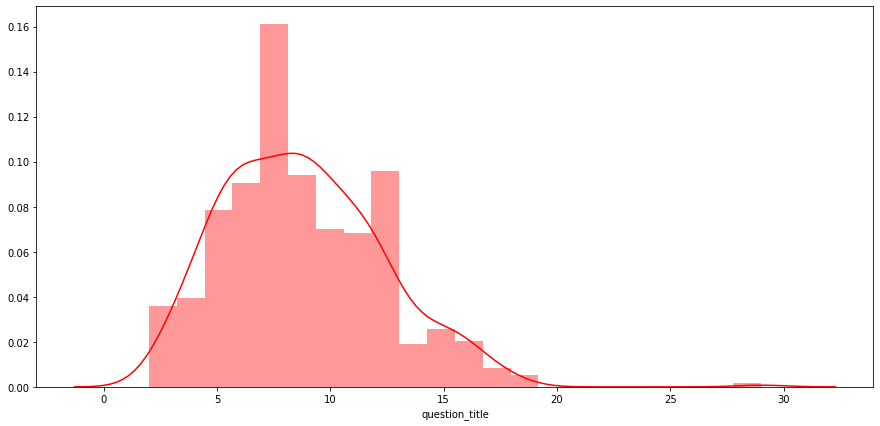

In [38]:
words = test['question_title'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [44]:
words = test['question_title'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage question_title text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage question_title text contains words less than : 14
92 percentage question_title text contains words less than : 14
93 percentage question_title text contains words less than : 15
94 percentage question_title text contains words less than : 15
95 percentage question_title text contains words less than : 15
96 percentage question_title text contains words less than : 16
97 percentage question_title text contains words less than : 16
98 percentage question_title text contains words less than : 16
99 percentage question_title text contains words less than : 17


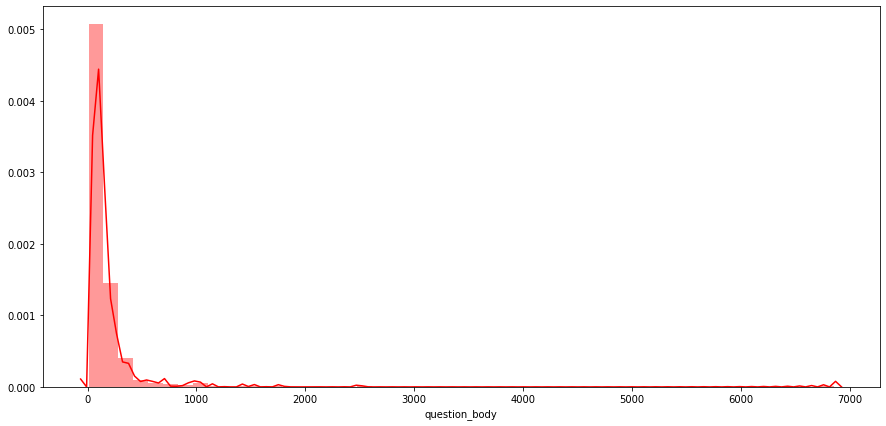

In [39]:
words = test['question_body'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [45]:
words = test['question_body'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage question_body text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage question_body text contains words less than : 307
92 percentage question_body text contains words less than : 338
93 percentage question_body text contains words less than : 376
94 percentage question_body text contains words less than : 395
95 percentage question_body text contains words less than : 442
96 percentage question_body text contains words less than : 582
97 percentage question_body text contains words less than : 717
98 percentage question_body text contains words less than : 976
99 percentage question_body text contains words less than : 1422


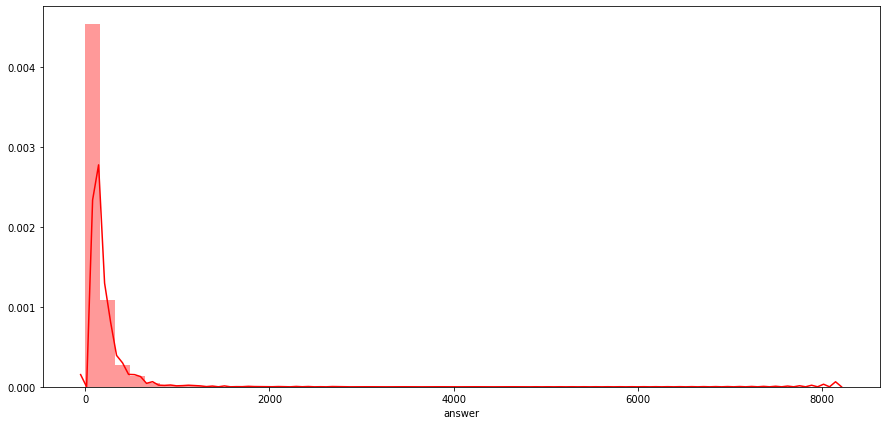

In [40]:
words = train['answer'].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,7))
sns.distplot(words, color='r')
plt.show()

In [46]:
words = test['answer'].apply(lambda x : len(x.split(' ')))
words = sorted(words.values)
for i in range(91,100):
    
    print("{} percentage answer text contains words less than : {}".format(i,words[round((len(words)*i)/100)]))

91 percentage answer text contains words less than : 383
92 percentage answer text contains words less than : 399
93 percentage answer text contains words less than : 415
94 percentage answer text contains words less than : 437
95 percentage answer text contains words less than : 478
96 percentage answer text contains words less than : 490
97 percentage answer text contains words less than : 601
98 percentage answer text contains words less than : 977
99 percentage answer text contains words less than : 1235


<h2>Target features</h2>

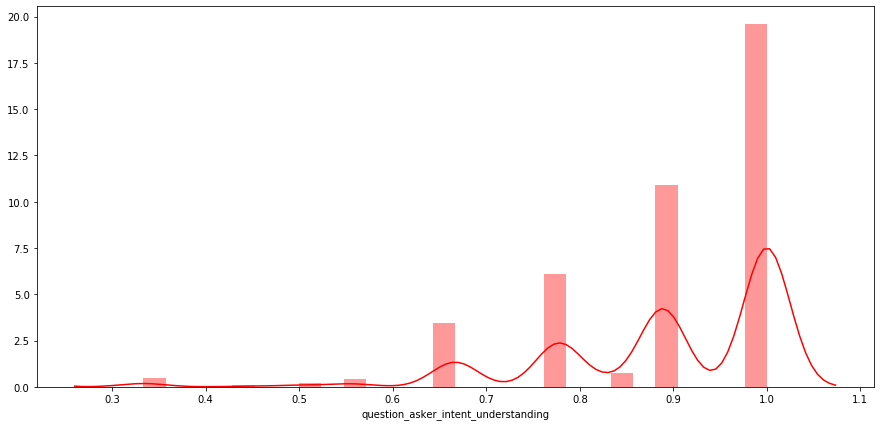

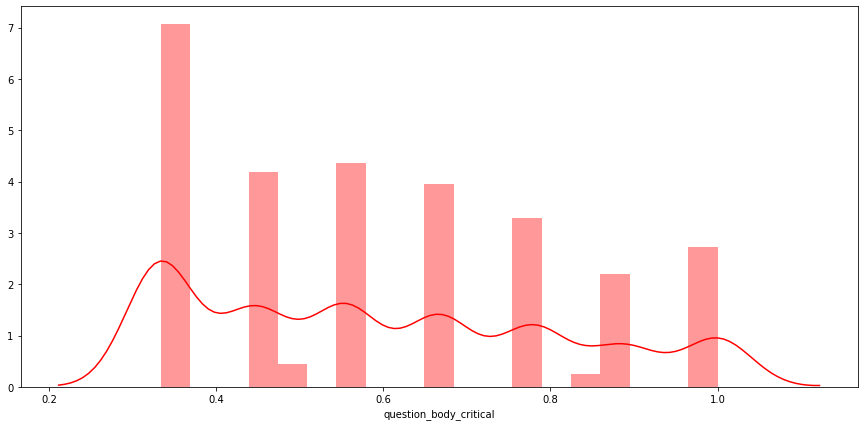

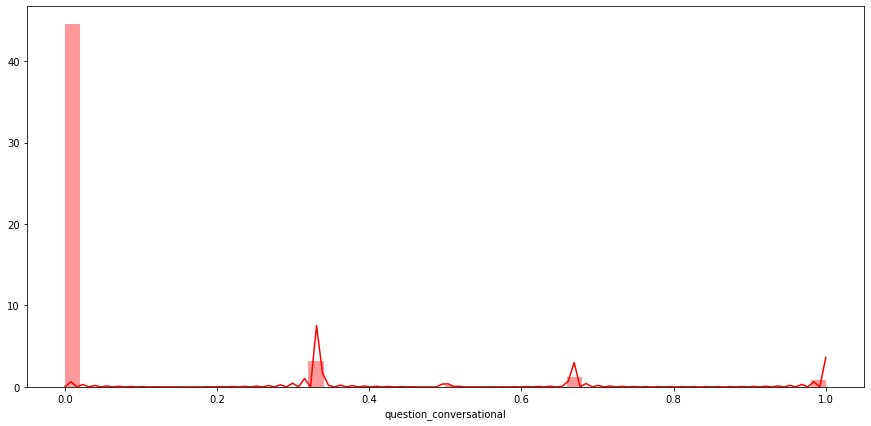

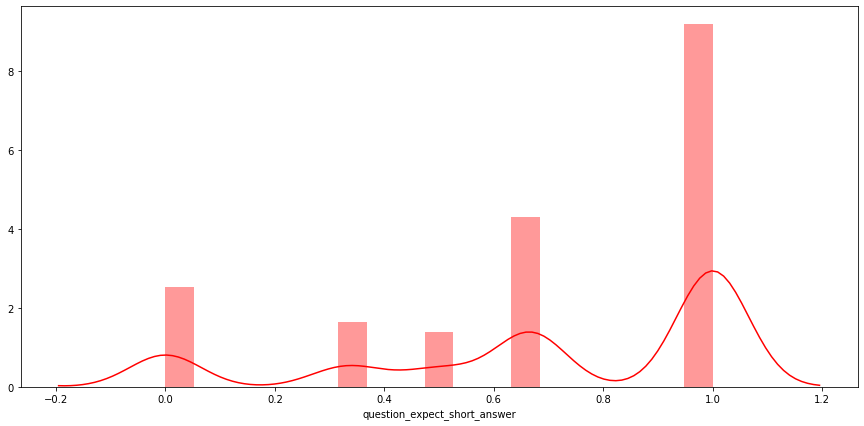

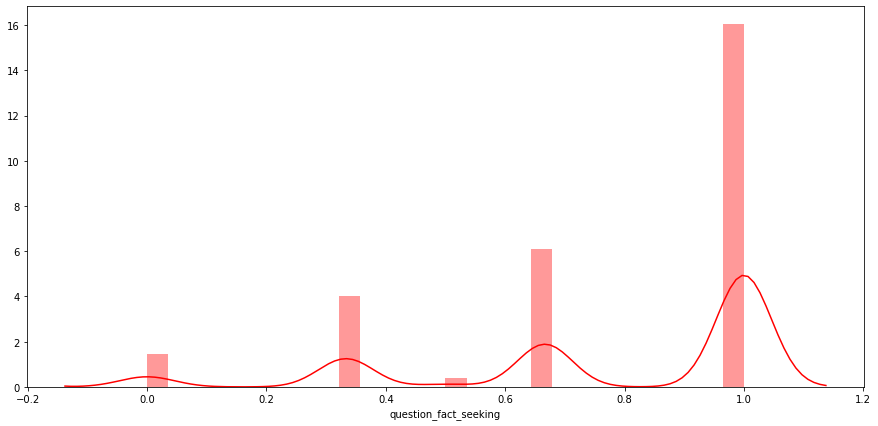

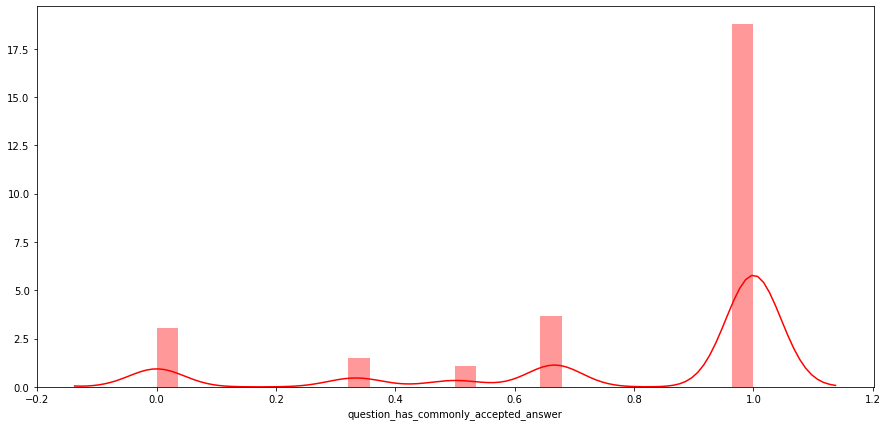

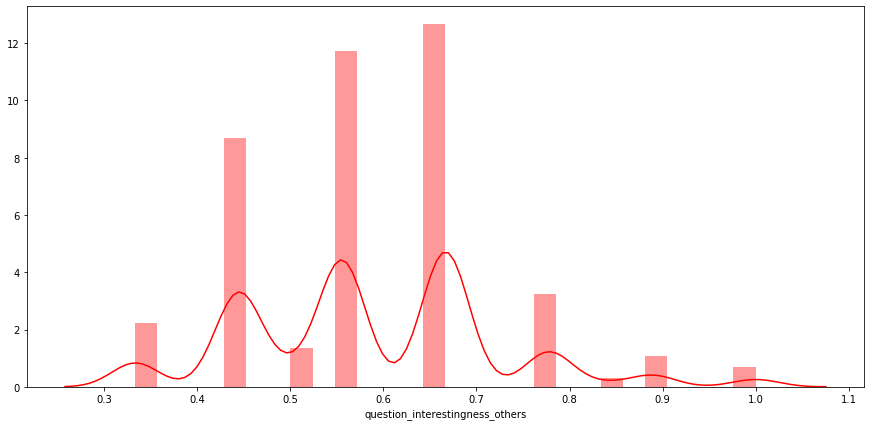

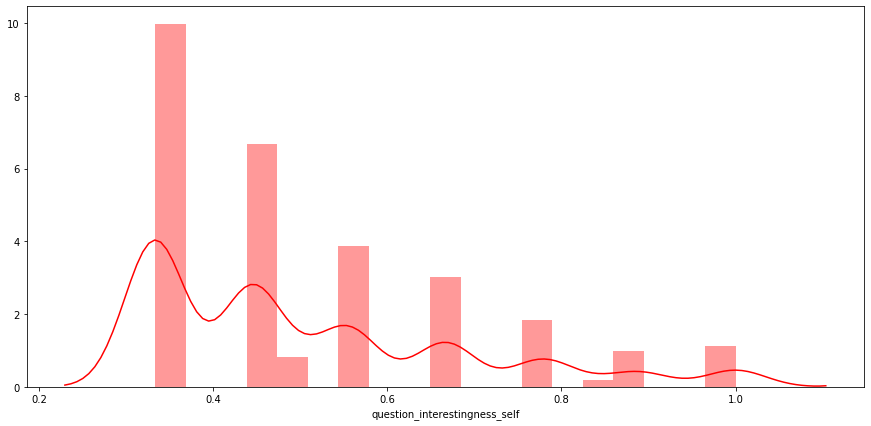

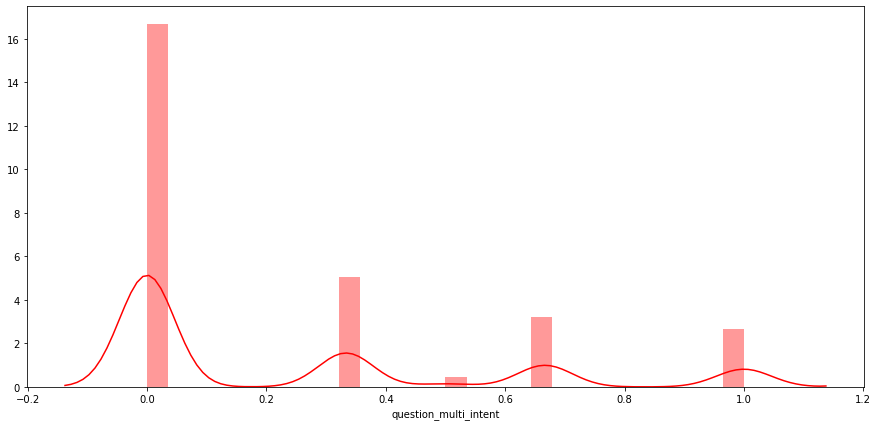

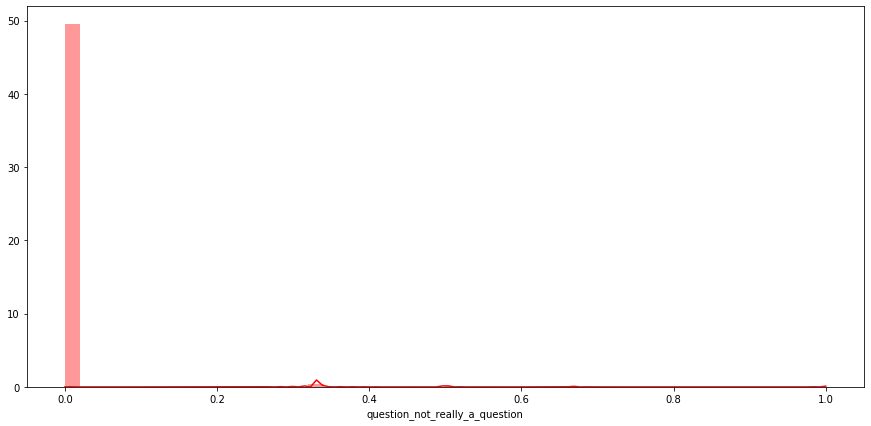

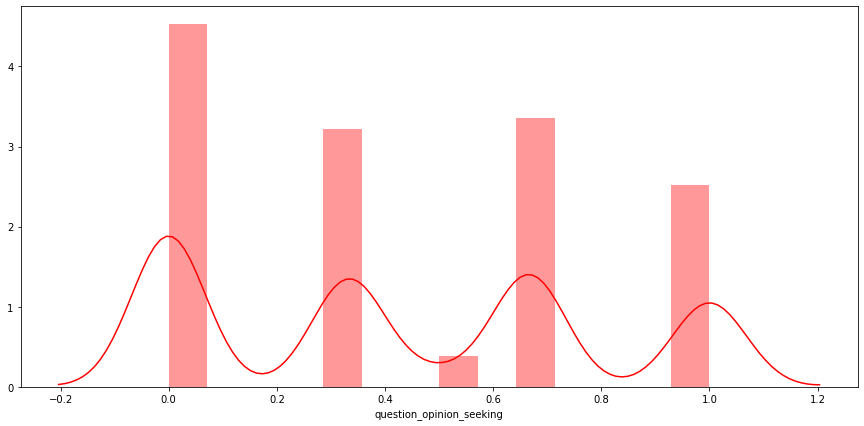

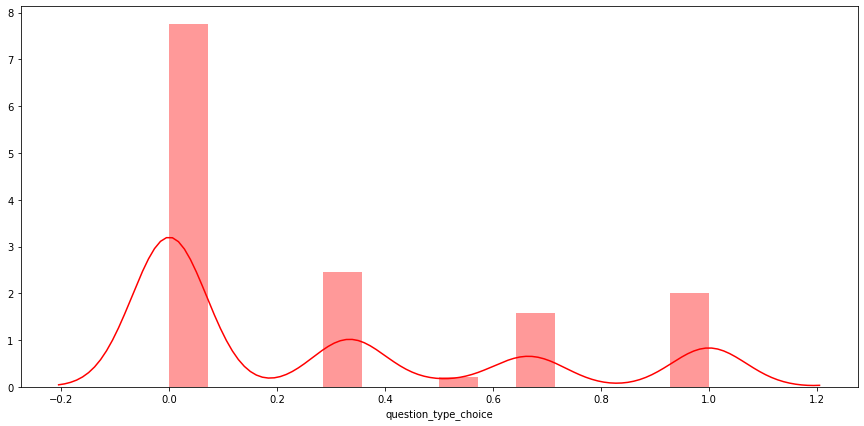

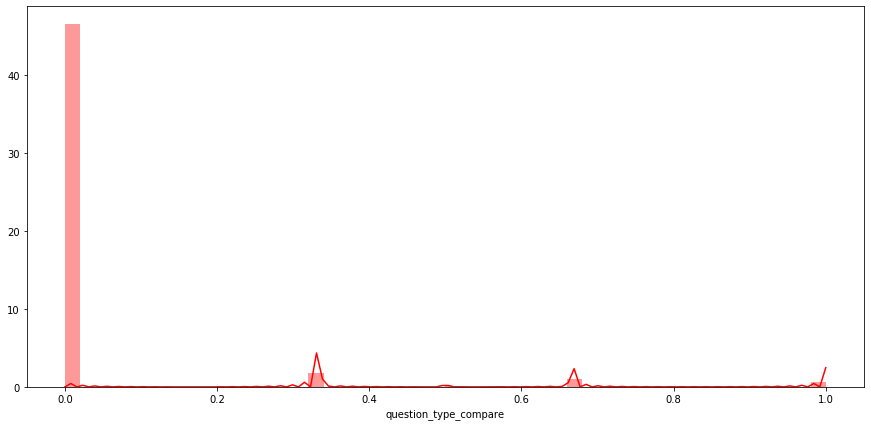

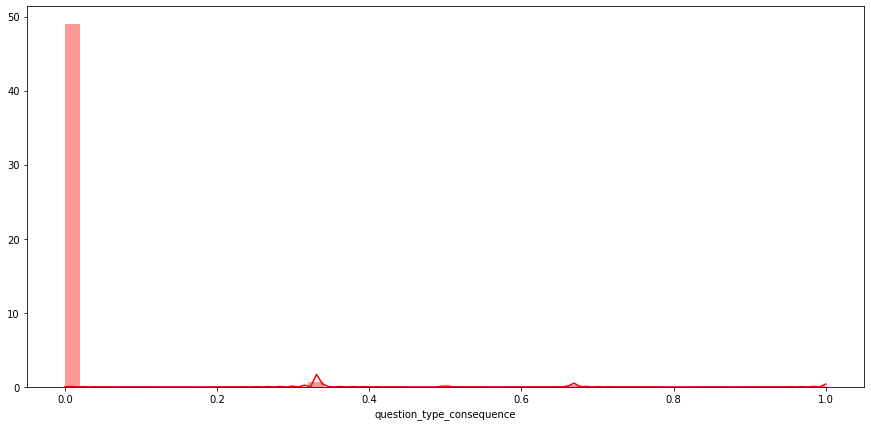

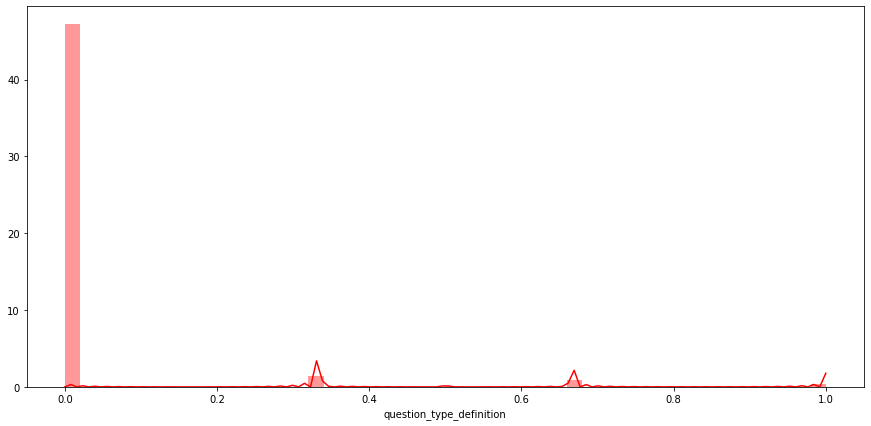

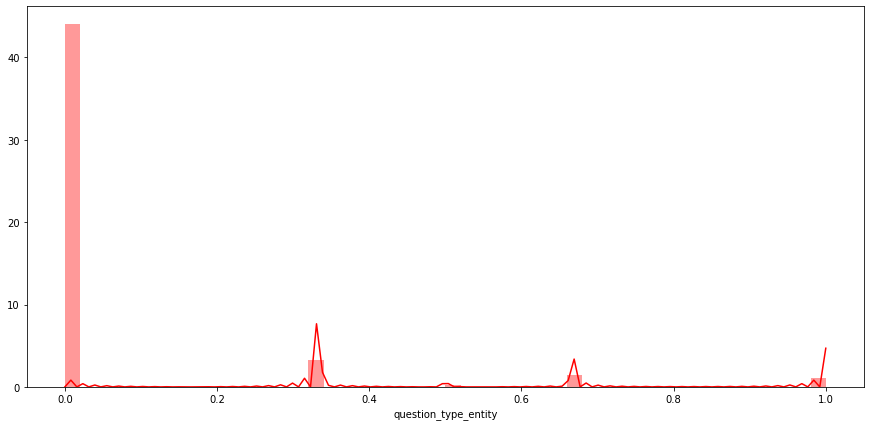

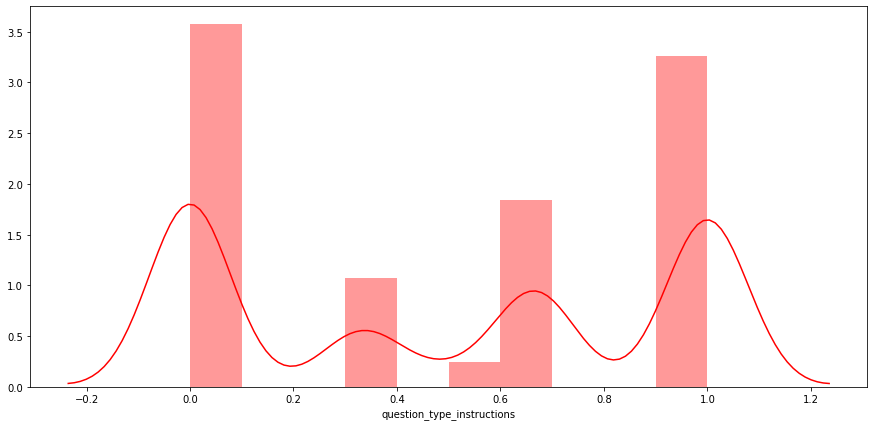

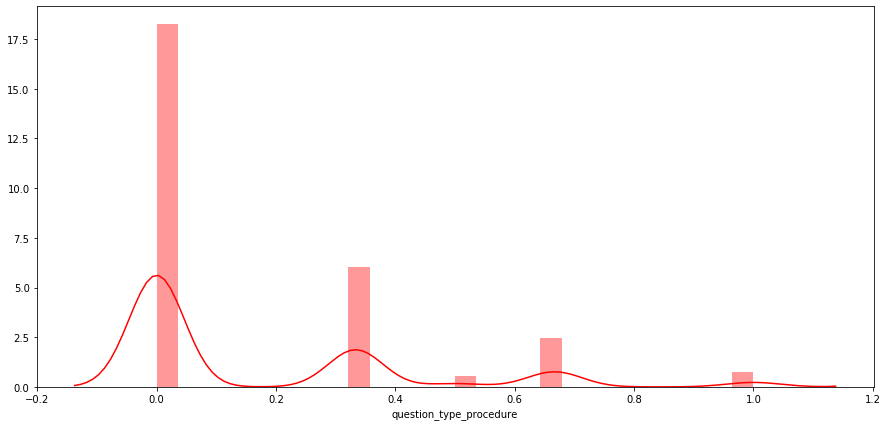

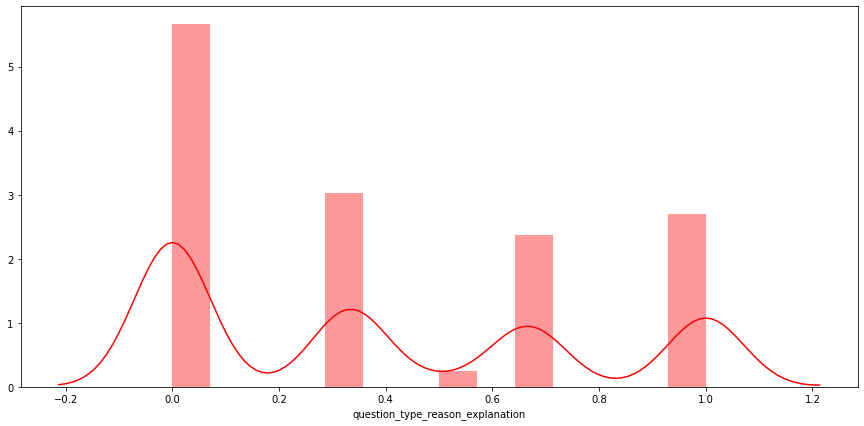

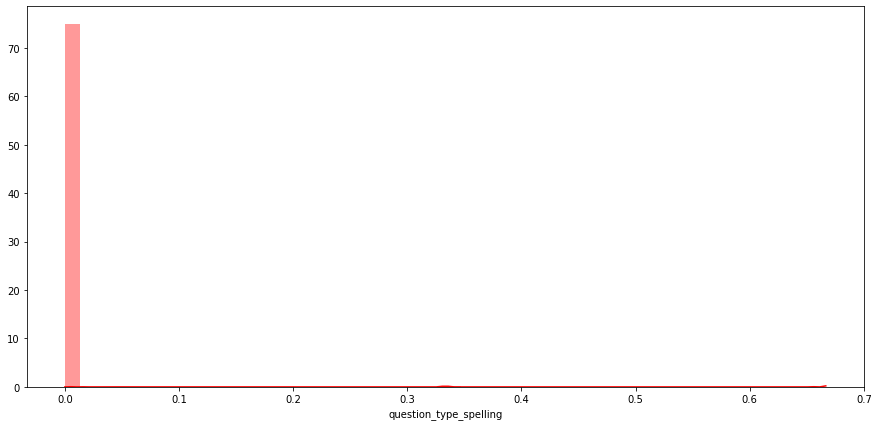

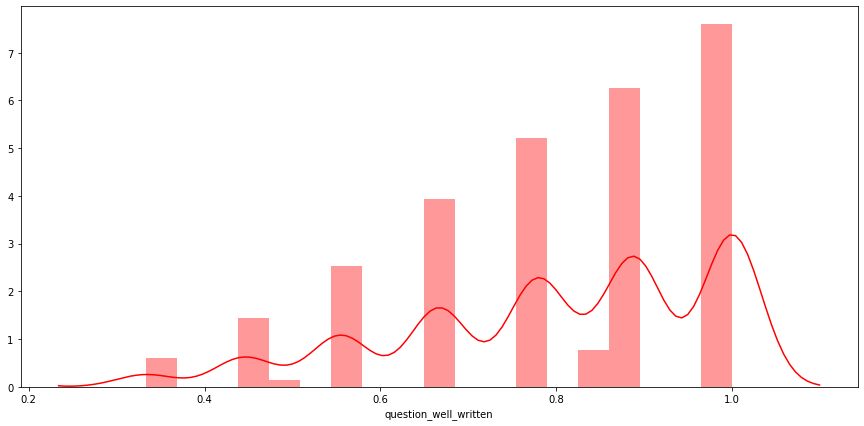

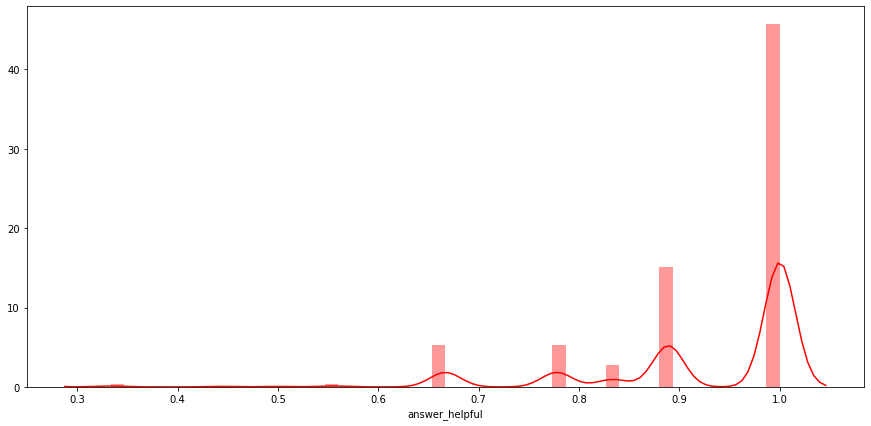

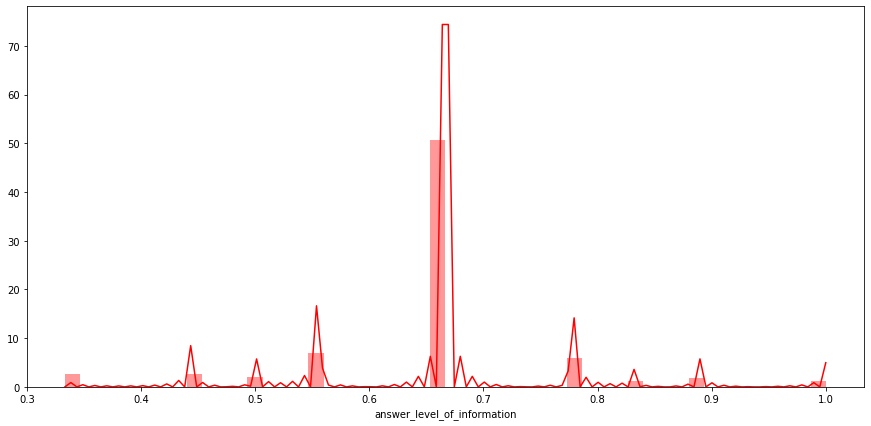

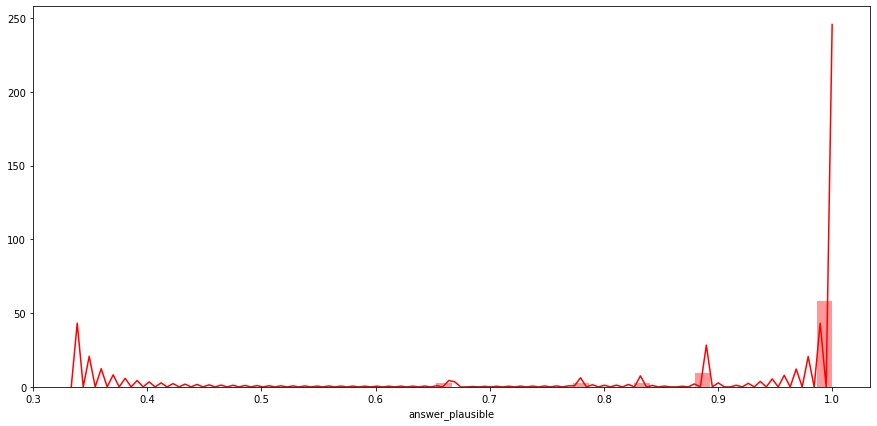

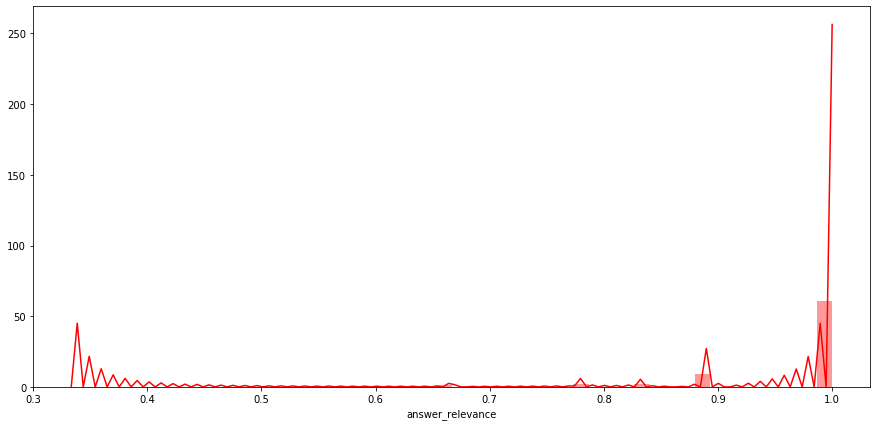

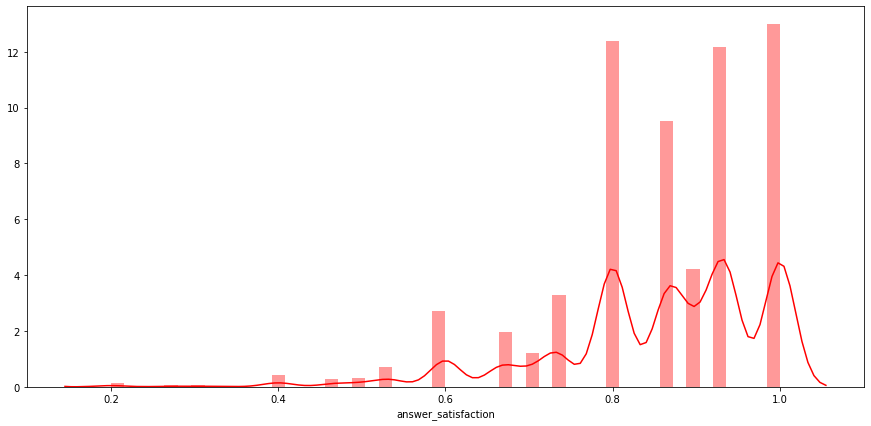

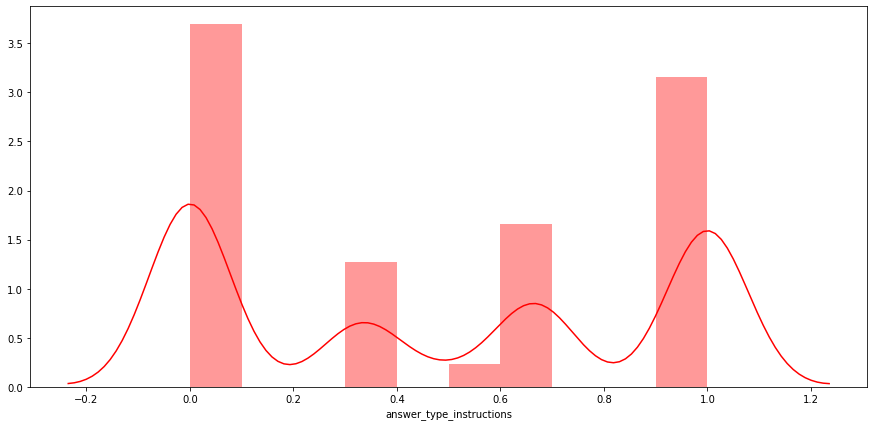

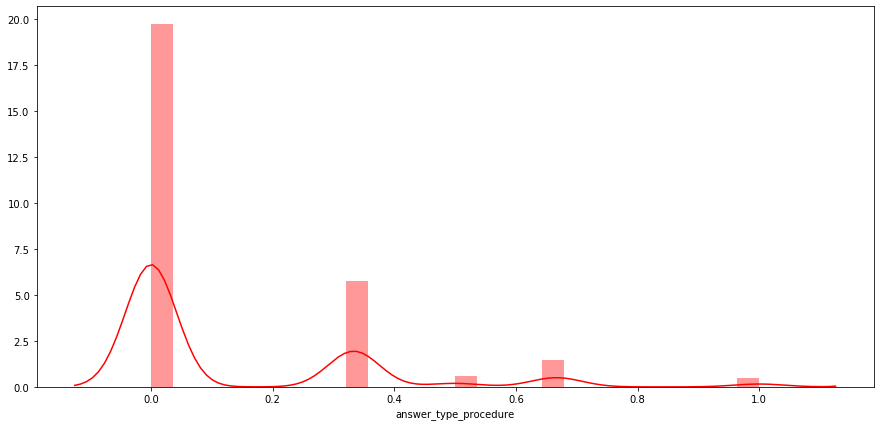

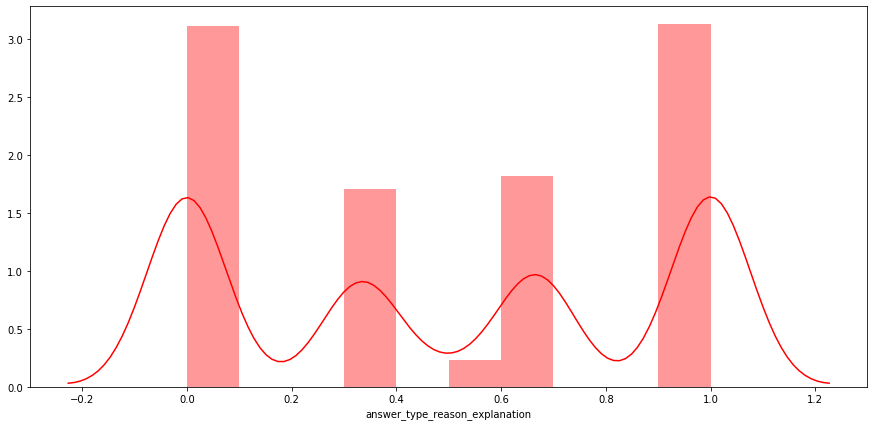

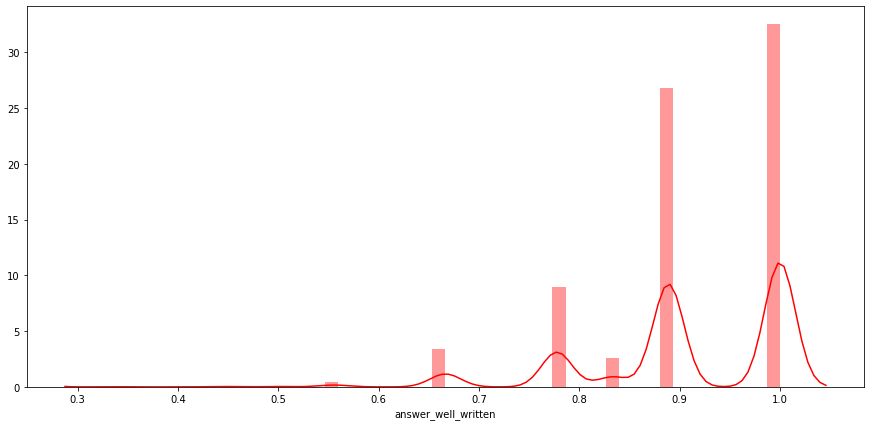

In [34]:
for i in train.columns:
    if i not in test.columns:
        plt.figure(figsize=(15,7))
        sns.distplot(train[i], color='r')
        plt.show()


<h2>obseravtions</h2>

<p>1. The train data contains many features among them 20 features are for training and 30 features are for target features.</p>
<p>2. Among these 20 features only 3 features are useful for predicting the target.</p>
<p>3. The three train features have more words for each row. Only small percentage of questions have highest number of words. So we can avoid not taking the highest number of words as processing. It is better to take number of words which have average number of words.</p>
<p>4. After observing the target feature, all are well distributed from o to 1 probabities but these features question_not_really_question, queation_type_consequence, question_type_spelling data have all data features with probabaility  0. If we implement these features for training we almost will get probabality zero for test data.</p>